# IMPORTS

## Libraries

In [1]:
import warnings

import numpy  as np
import pandas as pd

import seaborn           as sns
import matplotlib.pyplot as plt


from IPython.display      import Image
from IPython.core.display import HTML


warnings.filterwarnings("ignore")
np.random.seed(0)

## Load Dataset

In [2]:
dfRaw = pd.read_csv('../../01-Data/churn.csv')

In [3]:
dfRaw.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Helper Functions

In [4]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML('<style>.container { width:100% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()

In [5]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# DESCRIPTION

In [6]:
df01 = dfRaw.copy()

## Columns

In [7]:
df01.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## ~~Rename Columns~~

All the columns are in the camelize format already

## Data Dimensions

In [8]:
print(f'Number of Rows: {df01.shape[0]}')
print(f'Number of Columns: {df01.shape[1]}')

Number of Rows: 10000
Number of Columns: 14


## Data Types

In [9]:
df01.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Change Types

In [10]:
## Convert Objects type to categorical types >> more performatic
df01[df01.select_dtypes(include=['object']).columns] = df01.select_dtypes(include=['object']).astype('category')

## Convert Boolean integer columns to Boolean
df01[['HasCrCard', 'IsActiveMember', 'Exited']] = df01[['HasCrCard', 'IsActiveMember', 'Exited']].astype('bool')

In [11]:
df01.dtypes

RowNumber             int64
CustomerId            int64
Surname            category
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard              bool
IsActiveMember         bool
EstimatedSalary     float64
Exited                 bool
dtype: object

## Not a Number

### Sum

In [12]:
df01.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### ~~Fillout NA~~

there is no NA values

## Descriptive Statistical

In [13]:
# Numerical Attributes
numAttributes = df01.select_dtypes(include=['int64', 'float64'])
NotNumerial = ['RowNumber', 'CustomerId']
numAttributes = numAttributes[numAttributes.columns[~numAttributes.columns.isin(NotNumerial)]]

#Categorical Attributes
catAttributes = df01.select_dtypes(include=['category'])

#Boolean Attributes
boolAttributes = df01.select_dtypes(include=['bool'])

### Numerical Attributes

In [14]:
### Central Tendency -> Mean, Median
ct1 = pd.DataFrame(numAttributes.apply(np.mean)).T
ct2 = pd.DataFrame(numAttributes.apply(np.median)).T

### Dispersion -> std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(numAttributes.apply(np.std)).T
d2 = pd.DataFrame(numAttributes.apply(min)).T
d3 = pd.DataFrame(numAttributes.apply(max)).T
d4 = pd.DataFrame(numAttributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(numAttributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(numAttributes.apply(lambda x: x.kurtosis())).T

# Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['Attributes', 'Min', 'Max', 'Range', 'Mean', 'Median', 'Std', 'Skew', 'Kurtosis']
m

,Attributes,Min,Max,Range,Mean,Median,Std,Skew,Kurtosis
0,CreditScore,350.00,850.00,500.00,650.528800,652.000,96.648466,-0.071607,-0.425726
1,Age,18.00,92.00,74.00,38.921800,37.000,10.487282,1.011320,1.395347
2,Tenure,0.00,10.00,10.00,5.012800,5.000,2.892030,0.010991,-1.165225
3,Balance,0.00,250898.09,250898.09,76485.889288,97198.540,62394.285254,-0.141109,-1.489412
4,NumOfProducts,1.00,4.00,3.00,1.530200,1.000,0.581625,0.745568,0.582981
5,EstimatedSalary,11.58,199992.48,199980.90,100090.239881,100193.915,57507.617221,0.002085,-1.181518


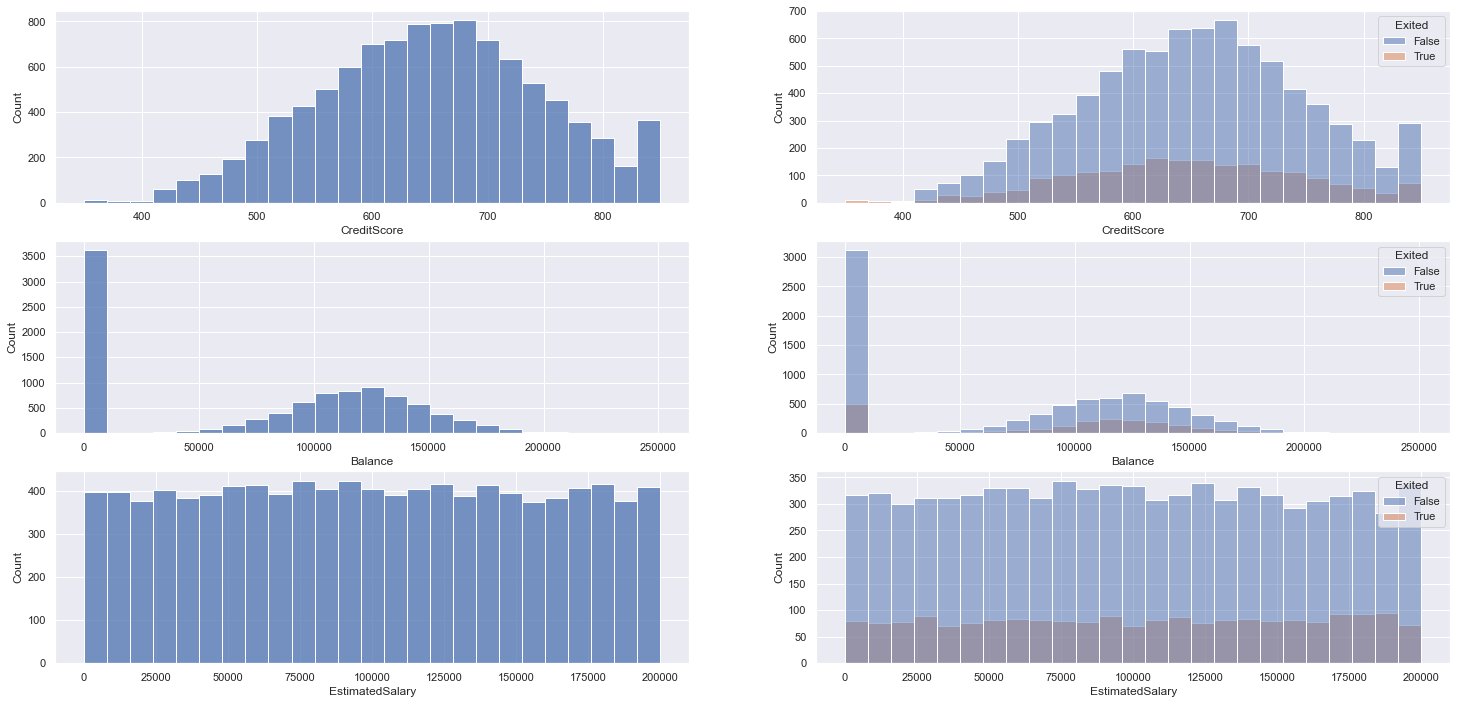

In [25]:
count = 1
attributesToInspect = ['CreditScore', 'Balance', 'EstimatedSalary']
rows= len(attributesToInspect)
for i in attributesToInspect:
    plt.subplot(rows, 2, count)
    sns.histplot(x=i, bins=25, data=df01)
    count += 1
    
    plt.subplot(rows, 2, count)
    sns.histplot(x=i, bins=25, hue='Exited', data=df01)
    count += 1
plt.show()

### Categorical Attributes

In [25]:
catAttributes.apply(lambda x: x.unique().shape[0])

Surname      2932
Geography       3
Gender          2
dtype: int64

<AxesSubplot:xlabel='Geography', ylabel='count'>

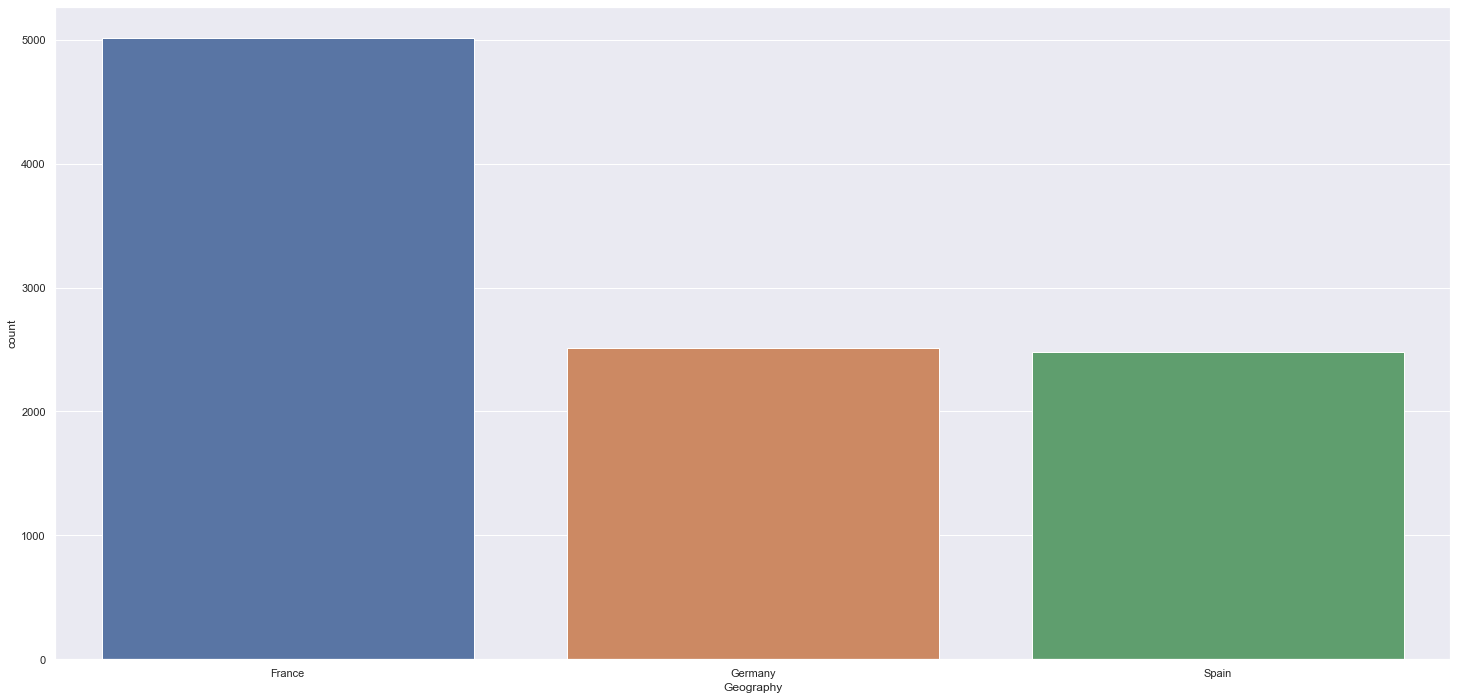

In [44]:
#sns.boxplot( x='Geography', y='Exited', data=df01 )
sns.countplot(x='Geography', data=df01)
# sns.barplot('Geography', data=df01)

In [34]:
plt.plot?

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,